## Challenge - Time Series Analysis
1. Plot the time series, along with any logical or necessary differences to get a stationary dataset
2. Generate and interpret a PACF for the time series (and/or its differences)
3. Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
4. Choose one specification and make the case for that as a logical model for your dataset

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [3]:
eth_price_raw = pd.read_csv('ethereum_price.csv')
eth_price_raw.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",943.57,965.26,892.95,895.37,"2,545,260,000","92,206,500,000"
1,"Feb 19, 2018",921.67,957.78,921.55,943.87,"2,169,020,000","90,047,700,000"
2,"Feb 18, 2018",973.35,982.93,915.45,923.92,"2,567,290,000","95,077,100,000"
3,"Feb 17, 2018",944.75,976.60,940.75,974.12,"2,525,720,000","92,264,000,000"
4,"Feb 16, 2018",934.79,950.00,917.85,944.21,"2,369,450,000","91,272,100,000"


In [4]:
eth_price_raw.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
924,"Aug 11, 2015",0.708087,1.130000,0.663235,1.070000,"1,463,100","42,796,500"
925,"Aug 10, 2015",0.713989,0.729854,0.636546,0.708448,"405,283","43,130,000"
926,"Aug 09, 2015",0.706136,0.879810,0.629191,0.701897,"532,170","42,637,600"
927,"Aug 08, 2015",2.790000,2.800000,0.714725,0.753325,"674,188","167,911,000"
928,"Aug 07, 2015",2.830000,3.540000,2.520000,2.770000,"164,329",-


In [6]:
eth_price_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
Date          929 non-null object
Open          929 non-null float64
High          929 non-null float64
Low           929 non-null float64
Close         929 non-null float64
Volume        929 non-null object
Market Cap    929 non-null object
dtypes: float64(4), object(3)
memory usage: 50.9+ KB


In [7]:
# set df to manipulate
eth_price = eth_price_raw[['Date', 'Close']].copy()

# convert date to datetime
eth_price['Date'] = pd.to_datetime(eth_price['Date'], format='%b %d, %Y')
eth_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 2 columns):
Date     929 non-null datetime64[ns]
Close    929 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.6 KB


In [8]:
print(eth_price.head())
print('number of nulls: {}'.format(eth_price.isnull().any().sum()))

        Date   Close
0 2018-02-20  895.37
1 2018-02-19  943.87
2 2018-02-18  923.92
3 2018-02-17  974.12
4 2018-02-16  944.21
number of nulls: 0


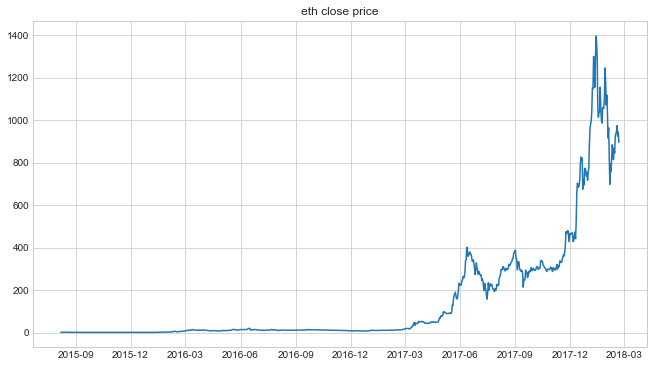

In [9]:
plt.figure(figsize=(11,6))
plt.plot(eth_price['Date'], eth_price['Close'])
plt.title('eth close price')
plt.show()

- Obvious trend
- Get stationary time series

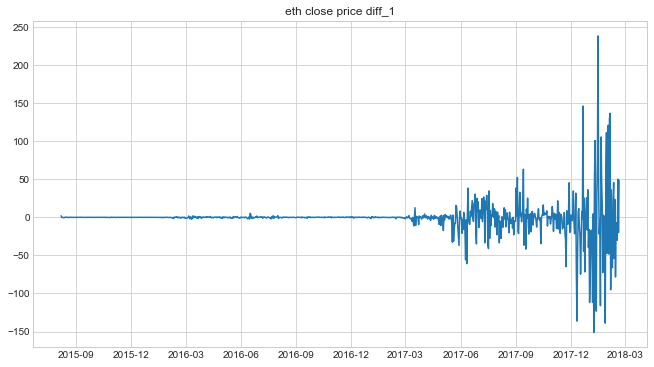

adf: -5.452774224086341
pval: 2.6218254367199483e-06
critical vals {'1%': -3.4375883271133243, '5%': -2.8647353885968214, '10%': -2.568471435365895}


In [10]:
eth_price['diff_1'] = eth_price.Close - eth_price.Close.shift()

plt.figure(figsize=(11,6))
plt.plot(eth_price['Date'], eth_price['diff_1'])
plt.title('eth close price diff_1')
plt.show()

from statsmodels.tsa.stattools import adfuller
print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['diff_1'][1:])[0],
    adfuller(eth_price['diff_1'][1:])[1],
    adfuller(eth_price['diff_1'][1:])[4]))

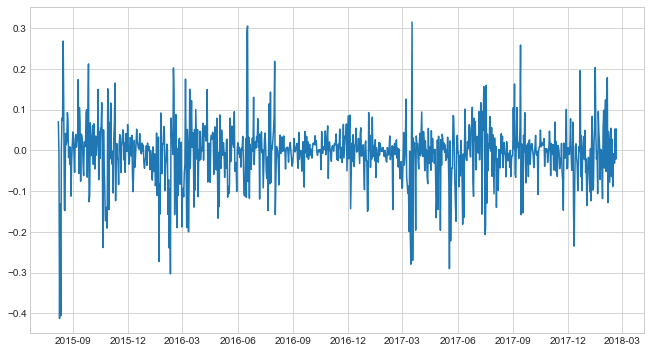

adf: -4.868501344872087
pval: 4.014704286082014e-05
critical vals {'1%': -3.4375643702748078, '5%': -2.8647248254388096, '10%': -2.568465808810804}


In [11]:
eth_price['log_return'] = (np.log(eth_price.Close) 
                           - np.log(eth_price.Close.shift(1)))

plt.figure(figsize=(11,6))
plt.plot(eth_price['Date'][1:-1], eth_price['log_return'][1:-1])
plt.show()

print('adf: {0}\npval: {1}\ncritical vals {2}'.format(
    adfuller(eth_price['log_return'][1:])[0],
    adfuller(eth_price['log_return'][1:])[1],
    adfuller(eth_price['log_return'][1:])[4]))

## Partial Autocorrelation Functions

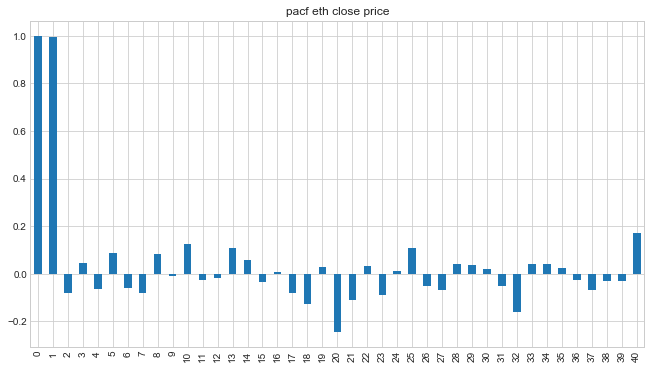

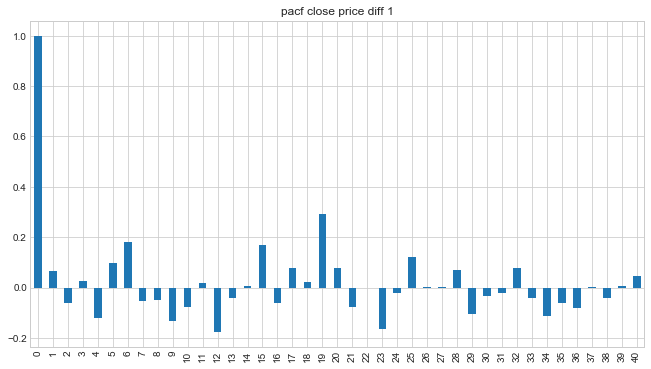

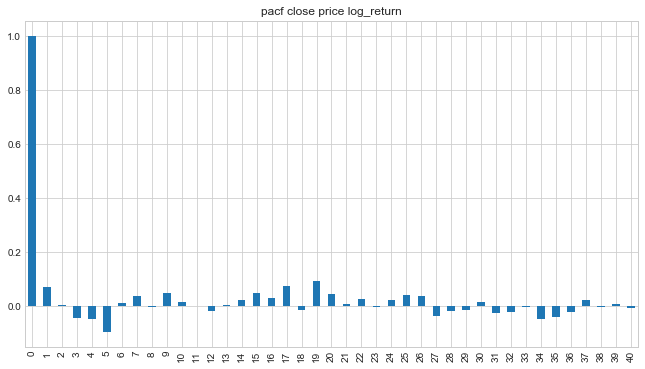

In [12]:
from statsmodels.tsa.stattools import pacf

x_acf = pd.DataFrame(pacf(eth_price.Close))
x_acf.plot(kind='bar', figsize=(11,6), legend=False)
plt.title('pacf eth close price')
plt.show()

x_acf2 = pd.DataFrame(pacf(eth_price.diff_1[1:]))
x_acf2.plot(kind='bar', figsize=(11,6), legend=False)
plt.title('pacf close price diff 1')
plt.show()

x_acf3 = pd.DataFrame(pacf(eth_price.log_return[1:]))
x_acf3.plot(kind='bar', figsize=(11,6), legend=False)
plt.title('pacf close price log_return')
plt.show()

Strong autocorrelation in initial time series at 1, none in diff_1 or log return

## ARIMA Models


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  928
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4203.967
Method:                           css   S.D. of innovations             22.448
Date:                Wed, 05 Sep 2018   AIC                           8411.935
Time:                        11:36:56   BIC                           8421.601
Sample:                             1   HQIC                          8415.622
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9619      0.737     -1.305      0.192      -2.406       0.482
residuals description
count    9.280000e+02
mean     1.665335e-16
std      2.246004e+01
min     -1.502481e+02
25%      3.618534e-01

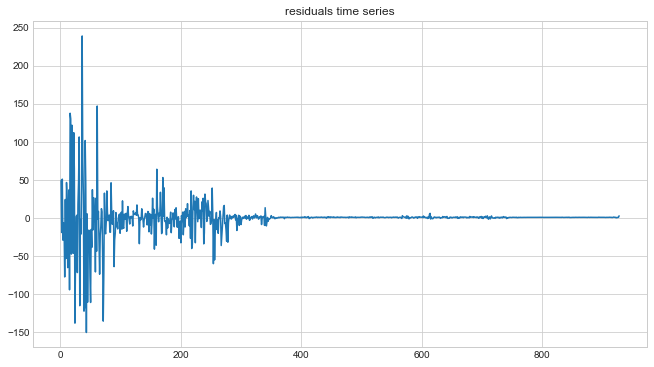

NormaltestResult(statistic=array([357.1033511]), pvalue=array([2.85754168e-78]))


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(eth_price.Close, order=(0,1,0)).fit()
print(model_010.summary())
print('residuals description')
print(model_010.resid.describe())

model_010_residuals = pd.DataFrame(model_010.resid)
model_010_residuals.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

from scipy.stats import normaltest
print(normaltest(model_010_residuals))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  929
Model:                     ARMA(1, 0)   Log Likelihood               -4211.892
Method:                       css-mle   S.D. of innovations             22.462
Date:                Wed, 05 Sep 2018   AIC                           8429.784
Time:                        11:37:02   BIC                           8444.286
Sample:                             0   HQIC                          8435.316
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         314.0845    290.190      1.082      0.279    -254.678     882.847
ar.L1.Close     0.9982      0.002    559.407      0.000       0.995       1.002
                                    Roots       

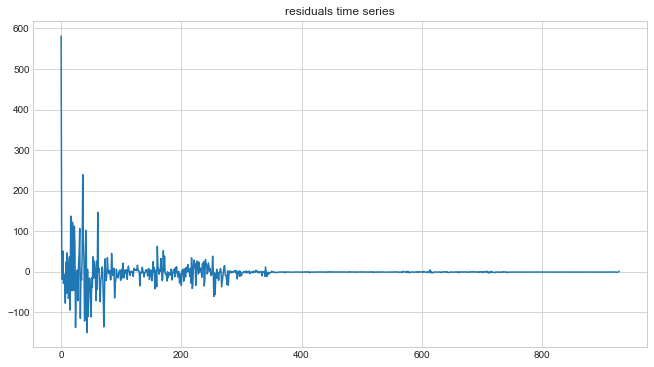

NormaltestResult(statistic=array([1431.40435904]), pvalue=array([1.49448909e-311]))


In [14]:
model_100 = ARIMA(eth_price.Close, order=(1,0,0)).fit()
print(model_100.summary())
print('residuals description')
print(model_100.resid.describe())

model_100_residuals = pd.DataFrame(model_100.resid)
model_100_residuals.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_100_residuals))

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  929
Model:                     ARMA(1, 1)   Log Likelihood               -4209.348
Method:                       css-mle   S.D. of innovations             22.401
Date:                Wed, 05 Sep 2018   AIC                           8426.696
Time:                        11:37:02   BIC                           8446.033
Sample:                             0   HQIC                          8434.072
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         294.0212    266.347      1.104      0.270    -228.010     816.052
ar.L1.Close     0.9978      0.002    478.291      0.000       0.994       1.002
ma.L1.Close     0.0793      0.035      2.255    

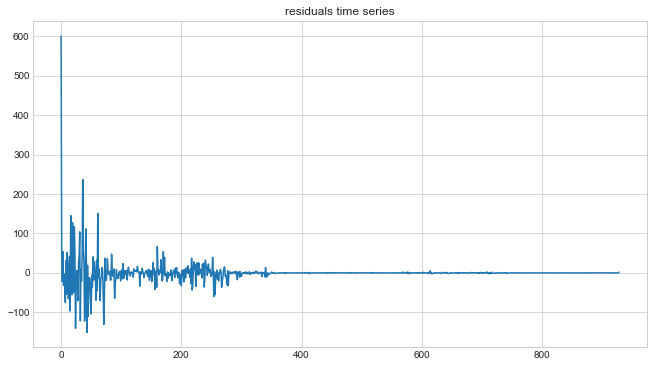

NormaltestResult(statistic=array([1474.75287901]), pvalue=array([0.]))


In [15]:
model_101 = ARIMA(eth_price.Close, order=(1,0,1)).fit()
print(model_101.summary())
print('residuals description')
print(model_101.resid.describe())

model_101_residuals = pd.DataFrame(model_101.resid)
model_101_residuals.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_101_residuals))

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  928
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4201.919
Method:                       css-mle   S.D. of innovations             22.398
Date:                Wed, 05 Sep 2018   AIC                           8409.838
Time:                        11:37:02   BIC                           8424.337
Sample:                             1   HQIC                          8415.369
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9578      0.788     -1.216      0.224      -2.501       0.586
ar.L1.D.Close     0.0665      0.033      2.026      0.043       0.002       0.131
                                    Root

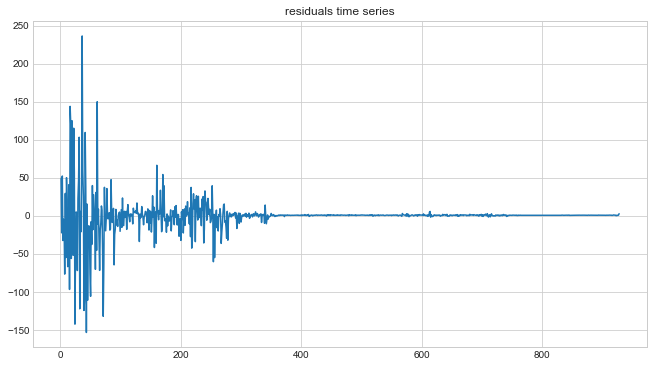

NormaltestResult(statistic=array([353.18019278]), pvalue=array([2.03186842e-77]))


In [16]:
model_110 = ARIMA(eth_price.Close, order=(1,1,0)).fit()
print(model_110.summary())
print('residuals description')
print(model_110.resid.describe())

model_110_residuals = pd.DataFrame(model_110.resid)
model_110_residuals.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_110_residuals))

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  928
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4198.344
Method:                       css-mle   S.D. of innovations             22.312
Date:                Wed, 05 Sep 2018   AIC                           8404.687
Time:                        11:37:03   BIC                           8424.019
Sample:                             1   HQIC                          8412.061
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9570      0.771     -1.241      0.215      -2.469       0.555
ar.L1.D.Close    -0.6289      0.254     -2.472      0.014      -1.128      -0.130
ma.L1.D.Close     0.7153      0.230     

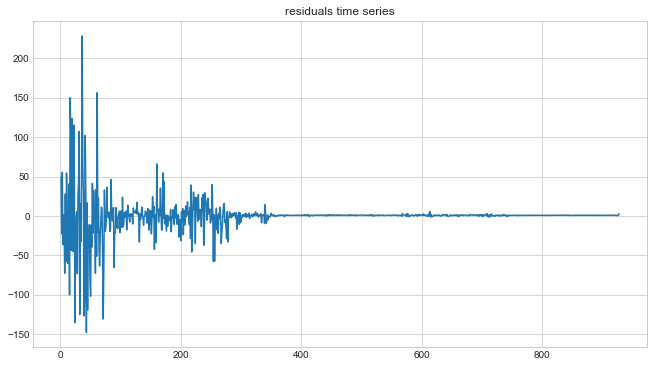

NormaltestResult(statistic=array([341.82765061]), pvalue=array([5.93019247e-75]))


In [17]:
model_111 = ARIMA(eth_price.Close, order=(1,1,1)).fit()
print(model_111.summary())
print('residuals description')
print(model_111.resid.describe())

model_111_residuals = pd.DataFrame(model_111.resid)
model_111_residuals.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()
print(normaltest(model_111_residuals))

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  927
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4200.228
Method:                       css-mle   S.D. of innovations             22.386
Date:                Wed, 05 Sep 2018   AIC                           8408.456
Time:                        11:37:03   BIC                           8427.784
Sample:                             1   HQIC                          8415.829
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0042      0.003      1.423      0.155      -0.002       0.010
ar.L1.D.diff_1     0.0651      0.033      1.981      0.048       0.001       0.130
ma.L1.D.diff_1    -1.0000      0.003

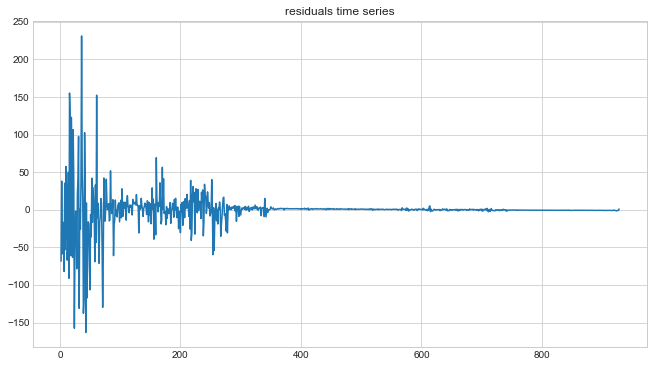

NormaltestResult(statistic=array([293.25469768]), pvalue=array([2.09195097e-64]))


In [18]:
model_111_diff_1 = ARIMA(eth_price.diff_1[1:], order=(1,1,1)).fit()
print(model_111_diff_1.summary())
print('residuals description\n{}'.format(model_111_diff_1.resid.describe()))

model_111_diff_1_resid = pd.DataFrame(model_111_diff_1.resid)
model_111_diff_1_resid.plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_111_diff_1_resid))

                             ARIMA Model Results                              
Dep. Variable:           D.log_return   No. Observations:                  927
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 970.991
Method:                       css-mle   S.D. of innovations              0.085
Date:                Wed, 05 Sep 2018   AIC                          -1933.982
Time:                        11:37:04   BIC                          -1914.654
Sample:                             1   HQIC                         -1926.609
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.221e-05   1.14e-05      1.069      0.285   -1.02e-05    3.46e-05
ar.L1.D.log_return     0.0923      0.038      2.430      0.015       0.018       0.167
ma.L1.D.log_return  

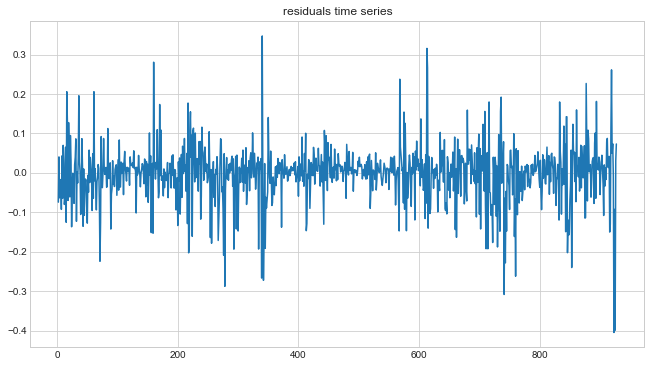

NormaltestResult(statistic=array([130.9833946]), pvalue=array([3.60842143e-29]))


In [19]:
model_111_log_return = ARIMA(eth_price.log_return[1:], order=(1,1,1)).fit()
print(model_111_log_return.summary())
print('residuals description')
print(model_111_log_return.resid.describe())

model_111_logret_resid = pd.DataFrame(model_111_log_return.resid)
model_111_logret_resid[:-1].plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_111_logret_resid[:-1]))

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                  928
Model:                     ARMA(1, 1)   Log Likelihood                 975.293
Method:                       css-mle   S.D. of innovations              0.085
Date:                Wed, 05 Sep 2018   AIC                          -1942.587
Time:                        11:37:04   BIC                          -1923.255
Sample:                             0   HQIC                         -1935.213
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0061      0.003     -1.984      0.048      -0.012   -7.29e-05
ar.L1.log_return     0.1136      0.268      0.424      0.671      -0.411       0.638
ma.L1.log_return    -0.0227 

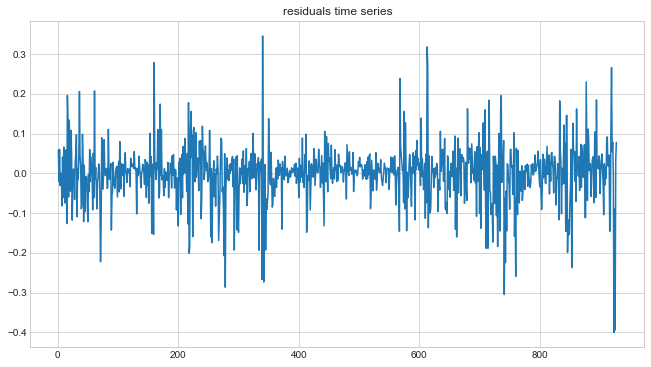

NormaltestResult(statistic=array([129.02484023]), pvalue=array([9.60753401e-29]))


In [20]:
model_101_log_return = ARIMA(eth_price.log_return[1:], order=(1,0,1)).fit()
print(model_101_log_return.summary())
print('residuals description')
print(model_101_log_return.resid.describe())

model_101_logret_resid = pd.DataFrame(model_101_log_return.resid)
model_101_logret_resid[:-1].plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_101_logret_resid[:-1]))

                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                  928
Model:                     ARMA(1, 0)   Log Likelihood                 975.290
Method:                       css-mle   S.D. of innovations              0.085
Date:                Wed, 05 Sep 2018   AIC                          -1944.580
Time:                        11:37:04   BIC                          -1930.081
Sample:                             0   HQIC                         -1939.049
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0061      0.003     -1.990      0.047      -0.012   -9.04e-05
ar.L1.log_return     0.0911      0.038      2.400      0.017       0.017       0.165
                            

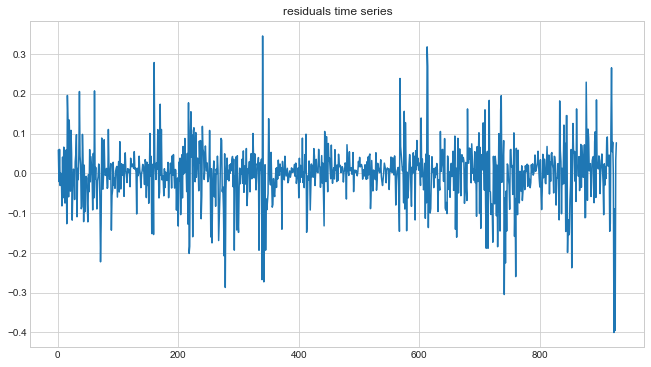

NormaltestResult(statistic=array([129.31170991]), pvalue=array([8.32374891e-29]))


In [21]:
model_100_log_return = ARIMA(eth_price.log_return[1:], order=(1,0,0)).fit()
print(model_100_log_return.summary())
print('residuals description')
print(model_100_log_return.resid.describe())

model_100_logret_resid = pd.DataFrame(model_100_log_return.resid)
model_100_logret_resid[:-1].plot(legend=False, figsize=(11,6))
plt.title('residuals time series')
plt.show()

print(normaltest(model_100_logret_resid[:-1]))

### Preferred model:
ARIMA(1,0,0) of log return time series.
- Coefficients are significant: p-values 0.047, 0.017 < 0.05
- Lowest AIC score: -1944.58
- Normality: residuals normal test is on the low end, 129.3 with significant p-val $8.32 x 10^{-29}$
- Log likelihood: on the high end, 975.29